In [31]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.cm

In [4]:
# exp_path = ".logs/1698311548790"
# exp_path = ".logs/1698310386029"

In [50]:
def load_states(paths):
    states = {}
    for exp_path in paths:
        with open(os.path.join(exp_path,"state.json")) as f:
            states[exp_path] = json.load(f)
    return states

def get_out_trade_utility(state):
    agent_1_proposal_utility = [ eval(_['out_trade_utility'])[1] for _ in state[0] if 'out_trade_utility' in _]
    agent_2_proposal_utility = [ eval(_['out_trade_utility'])[2] for _ in state[1] if 'out_trade_utility' in _]
    return {1: agent_1_proposal_utility, 2: agent_2_proposal_utility }


In [71]:
states = load_states([
        ".logs/1698311548790", 
        ".logs/1698310386029", 
        ".logs/1698323696426", 
        ".logs/1698323856735",
        ".logs/1698324227217",
        ".logs/1698324504841"
])

In [72]:
utilities = [get_out_trade_utility(_) for _ in states.values()]

In [73]:
utilities

[{1: [100.0, 140.0, 160.0, 180.0, 200.0], 2: [150.0, 170.0, 180.0, 190.0]},
 {1: [100.0, 140.0, 180.0], 2: [150.0, 170.0, 200.0]},
 {1: [100.0, 140.0, 160.0, 180.0, 200.0], 2: [150.0, 150.0, 150.0, 150.0]},
 {1: [100.0, 140.0, 160.0, 180.0, 200.0], 2: [150.0, 150.0, 150.0, 150.0]},
 {1: [150.0, 170.0, 160.0, 150.0, 140.0, 130.0],
  2: [150.0, 150.0, 150.0, 150.0, 150.0, 150.0]},
 {1: [100.0, 200.0], 2: [150.0]}]

Text(0, 0.5, 'Proposed Trade Utility')

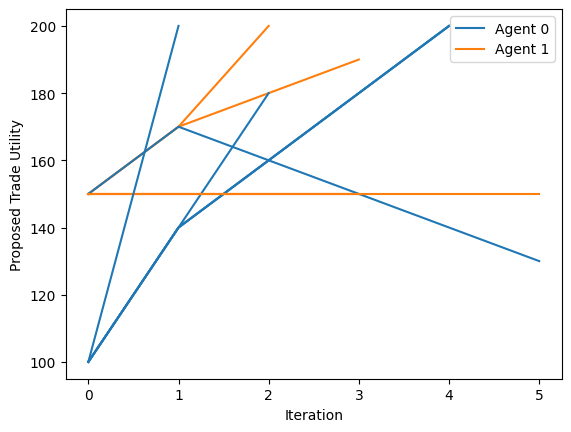

In [75]:
color = matplotlib.cm.datad['tab10']['listed']
for util in utilities:
    for idx, _ in enumerate(util.values()):
        plt.plot(_, color=color[idx])

plt.legend(['Agent 0', 'Agent 1'])
plt.xlabel('Iteration')
plt.ylabel('Proposed Trade Utility')

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))